In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import linprog
from funcoes_auxiliares import *
from funcoes_graficos import *
from gerador_de_problemas import *
from gradiente_circuncentro import *
from funcoes_tabelas import *
from gradiente_circuncentro_w import *
from scipy import optimize
from gerador_pl_Sokolinsky import *

In [81]:
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")
result

C:\Users\matia\AppData\Local\Temp\ipykernel_11936\418667290.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -177.50634527933386
       x: [ 9.782e+00  1.286e+01]
     nit: 10

In [28]:
n = 10
d = 50
alpha = 20
theta = 5
pho = 2
Smin = 5
Lmax = 0.2
amax = 100
bmax = 10000
A,b,c,h  = gera_pl(n,d,alpha,theta,pho,Smin,Lmax,amax,bmax)

In [29]:
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico_modificado(h,c,A,b,max_iter=1000000)
result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")

Iteração 3: Ciclagem detectada! Acionando passo do simplex.
Iteração 8: Ciclagem detectada! Acionando passo do simplex.
Iteração 12: Ciclagem detectada! Acionando passo do simplex.
Iteração 18: Ciclagem detectada! Acionando passo do simplex.
Iteração 22: Ciclagem detectada! Acionando passo do simplex.
Iteração 28: Ciclagem detectada! Acionando passo do simplex.
Iteração 32: Ciclagem detectada! Acionando passo do simplex.
Iteração 38: Ciclagem detectada! Acionando passo do simplex.
Iteração 42: Ciclagem detectada! Acionando passo do simplex.
Iteração 48: Ciclagem detectada! Acionando passo do simplex.
Iteração 52: Ciclagem detectada! Acionando passo do simplex.
Iteração 58: Ciclagem detectada! Acionando passo do simplex.
Iteração 62: Ciclagem detectada! Acionando passo do simplex.
Iteração 68: Ciclagem detectada! Acionando passo do simplex.
Iteração 72: Ciclagem detectada! Acionando passo do simplex.
Iteração 78: Ciclagem detectada! Acionando passo do simplex.
Iteração 83: Ciclagem dete

C:\Users\matia\AppData\Local\Temp\ipykernel_21856\1799922581.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method="simplex")


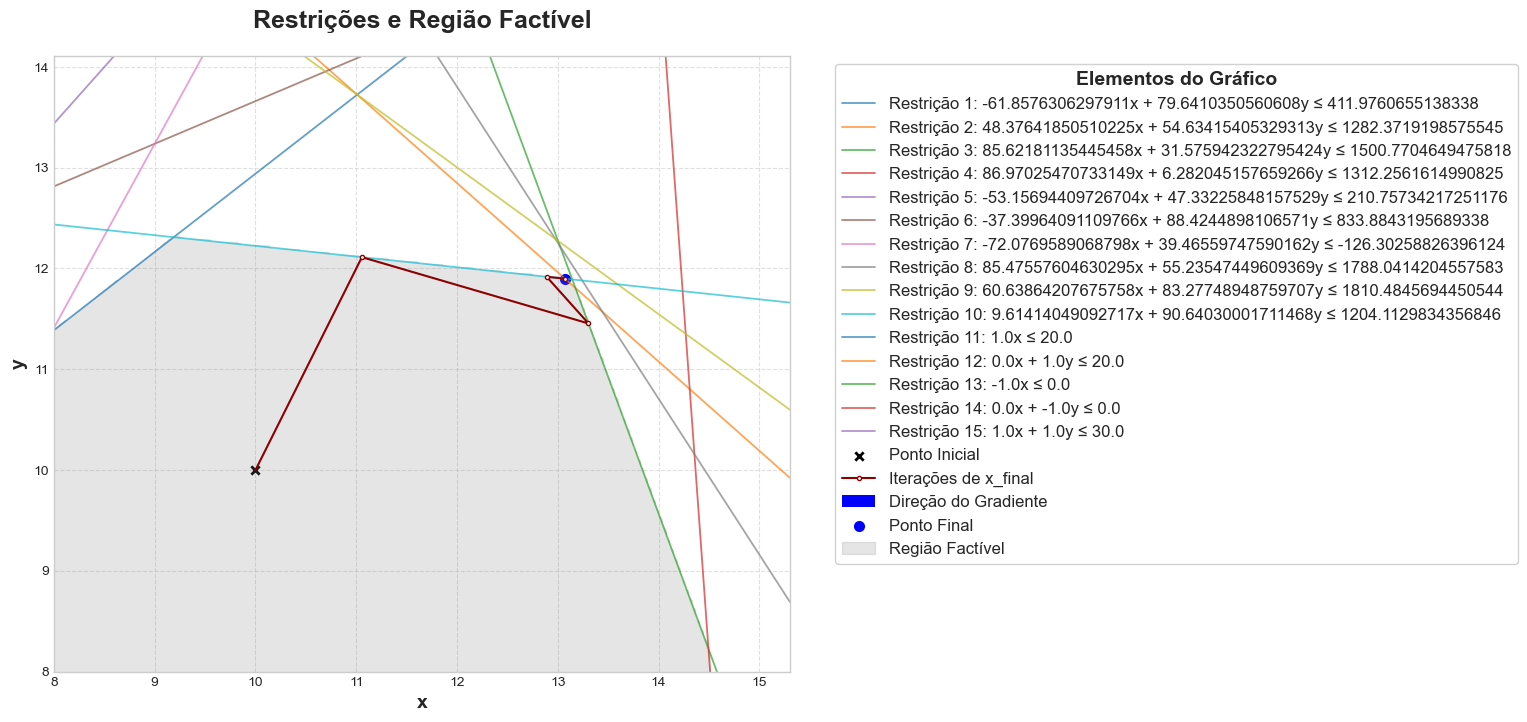

In [23]:
grafico1(historico_solucao,A,b,gradiente)

In [31]:
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(10)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
37034,37034,"[8.701964317229232, 12.674557826492633, 11.687...",-3504.24646,"[26, 37, 38]","[-0.06530505818315455, 0.017907625540868492, 0...",7.495171e-12,1.338197e-12
37035,37035,"[8.701964317228741, 12.674557826492768, 11.687...",-3504.24646,"[26, 3, 42, 38]","[0.05510313979727362, 0.007240805256550027, -0...",7.331415e-12,1.007766e-12
37036,37036,"[8.701964317229145, 12.674557826492821, 11.687...",-3504.24646,"[3, 37, 38, 14, 15]","[-0.15321003873219516, -0.07015284531651508, -...",6.039518e-12,1.221346e-12
37037,37037,"[8.701964317228219, 12.674557826492396, 11.687...",-3504.24646,"[26, 3, 42, 37]","[0.028693177739288343, -0.010366208834778692, ...",2.772456e-12,7.132244e-13
37038,37038,"[8.701964317228299, 12.674557826492368, 11.687...",-3504.24646,"[3, 37, 38, 42, 14, 26]","[-0.003969435514993187, 0.0038025152591898877,...",9.606134e-11,1.779361e-12
37039,37039,"[8.701964317227917, 12.674557826492734, 11.687...",-3504.24646,"[37, 38, 42, 14, 15, 24, 26]","[-0.003903774623151439, 0.0036287980551563473,...",9.461266e-11,1.629128e-12
37040,37040,"[8.701964317227548, 12.674557826493077, 11.687...",-3504.24646,"[3, 38, 42, 14, 15, 24, 26]","[0.040905964569763115, 0.02955856557110395, -0...",1.202491e-11,8.510344e-13
37041,37041,"[8.70196431722804, 12.674557826493432, 11.6879...",-3504.24646,"[3, 37, 38, 42, 14, 15, 24, 26]","[-0.0011435281743129924, 0.0027773472519566564...",3.815589e-10,3.947091e-12
37042,37042,"[8.701964317227603, 12.674557826494492, 11.687...",-3504.24646,"[3, 37, 38, 42, 14, 15, 48, 24, 26]","[0.0006845120619685743, -0.0013691951715697898...",8.944461e-09,2.044378e-11
37043,37043,"[8.701964317233726, 12.674557826482246, 11.687...",-3504.24646,"[33, 3, 37, 38, 42, 14, 15, 48, 24, 26]",[nan],NaN,NaN


In [7]:
from scipy.linalg import null_space

def calcular_direcao_aresta(A_ativos, c):

    if A_ativos.shape[0] == 0:

        return -c / np.linalg.norm(c)

    Z = null_space(A_ativos)

    if Z.shape[1] == 0:
        return np.zeros(len(c))

    d_proj = Z.dot(Z.T.dot(-c))

    if np.dot(c, d_proj) >= -1e-8: 
        return np.zeros(len(c))

    norma = np.linalg.norm(d_proj)
    if norma < 1e-8:
        return np.zeros(len(c))
        
    return d_proj / norma

In [8]:

from scipy.linalg import null_space

def gradiente_descendente_circuncentrico_modificado(x0, c, A, b, tol=1e-6, max_iter=1000):

    x = np.array(x0, dtype=float)
    n = len(c)
    m = len(b)
    grad = np.array(c)
    historico_solucao = [x.copy()]
    restricoes_ativas_hist = []
    vetores_direcao = []
    lista_alphas = []
    tamanho_passo = []
    valores_funcao_objetivo = [np.dot(c, x)]
    index_ativos_hist = [] 

    for i in range(max_iter):
        
        i_ativos = check_active_constraints(x, A, b, tol)
        index_ativos_hist.append(set(i_ativos)) 

        tomar_passo_simplex = False
        if i >= 2:
            if index_ativos_hist[-1] == index_ativos_hist[-3]:
                print(f"Iteração {i}: Ciclagem detectada! Acionando passo do simplex.")
                tomar_passo_simplex = True

        A_ativos_raw = A[i_ativos].astype(float)
        restricoes_ativas_hist.append(A_ativos_raw.copy())

        if tomar_passo_simplex:

            direcao = calcular_direcao_aresta(A_ativos_raw, grad)
        else:

            restricoes = A_ativos_raw.copy()
            for j in range(len(restricoes)):
                norma_r = np.linalg.norm(restricoes[j])
                if norma_r > tol:
                    restricoes[j] = restricoes[j] / norma_r

            grad_normalizado = grad / np.linalg.norm(grad)
            if len(restricoes) > 0:
                restricoes = np.vstack([restricoes, grad_normalizado])
            else:
                restricoes = np.array([grad_normalizado])
            
            direcao = circuncentro(-restricoes)

        if np.linalg.norm(direcao) < tol:
            print(f"Iteração {i}: Convergência alcançada. Norma da direção < {tol}")
            break
        vetores_direcao.append(direcao)

        alphas = []
        for k in range(m):
            a_k = A[k]
            prod = np.dot(a_k, direcao)
            if prod <= 1e-8:
                continue
            alpha = (b[k] - np.dot(a_k, x)) / prod
            alphas.append(alpha)

        if not alphas:
            print("Problema não limitado na direção de descida")
            break

        alpha = min(alphas)
        if alpha < 0 and abs(alpha) < tol: 
            alpha = 0
            
        lista_alphas.append(alpha)
        
        x_old = x.copy()
        

        p = 1.0 
        x = x + alpha * direcao * p

        tamanho_passo.append(np.linalg.norm(x - x_old))
        historico_solucao.append(x.copy())
        
        f_val = np.dot(c, x)
        valores_funcao_objetivo.append(f_val)


    # Renomeado o retorno para corresponder às novas variáveis
    return historico_solucao, valores_funcao_objetivo, index_ativos_hist, restricoes_ativas_hist, vetores_direcao, lista_alphas, tamanho_passo, grad